In [1]:
from selenium import webdriver
import urllib.request
from bs4 import BeautifulSoup
import time

In [4]:
options = webdriver.ChromeOptions()

driver = webdriver.Chrome('/Users/LimSH/Downloads/chromedriver_win32/chromedriver.exe', chrome_options=options)
driver.implicitly_wait(5)
driver.get("https://www.seoul.go.kr/coronaV/coronaStatus.do?menu_code=01#status_page_top")
time.sleep(3)

C:\Users\LimSH\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: use options instead of chrome_options
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
route_list = []
next_page = 'continue'
while True:
    for i in range(1, 101):
        date = driver.find_element_by_css_selector('#DataTables_Table_0 > tbody > tr:nth-child('+str(i)+') > td:nth-child(3)')
        if date.text == '9.30.':  # 10.01 ~ 12.11
            next_page = 'stop'
            print(next_page)
            break
        text = driver.find_element_by_css_selector('#DataTables_Table_0 > tbody > tr:nth-child('+str(i)+') > td:nth-child(6)')
        route_list.append(text.text)
    print(len(route_list))
    time.sleep(1)
    
    if next_page == 'stop':
        break
    else:
        next_page = driver.find_element_by_css_selector('#DataTables_Table_0_next')
        next_page.click()
        time.sleep(2)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
stop
6465


In [8]:
from collections import Counter
import pandas as pd

result = Counter(route_list)
#print(result)

cause_list = []
count_list = []
for key in result:
    #print(key, result[key])
    cause_list.append(key)
    count_list.append(result[key])
    
corona = {'발생장소' : cause_list, '확진자수' : count_list}    
df = pd.DataFrame(corona)
corona = df.sort_values(by='확진자수', ascending=False)
pd.set_option('display.max_row', 300)
display(corona)

,발생장소,확진자수
1,기타 확진자 접촉,1917
0,감염경로 조사중,1280
5,타시도 확진자 접촉,372
9,종로구 소재 파고다타운 관련,160
2,해외 유입,153
8,강서구 댄스교습관련 시설,151
53,서초구 사우나 관련,82
25,서초구 사우나Ⅱ 관련,80
111,동대문구 에이스희망케어센터 관련,71
106,강남구 헬스장 관련,66


In [15]:
word1 = corona['발생장소'].str.contains('병원')
word2 = corona['발생장소'].str.contains('의료기관')
hospital = corona[word1 | word2]
hospital = hospital[~hospital['발생장소'].str.contains('요양')]
hospital = hospital[~hospital['발생장소'].str.contains('확진자')]

hospital['Category'] = '병원'
columns_reordering = ['Category', '발생장소', '확진자수']
hospital = hospital[columns_reordering]

display(hospital)
print('병원 : ', len(hospital))
print('확진자수 합계 : ', hospital['확진자수'].sum())

,Category,발생장소,확진자수
52,병원,동대문구 지혜병원 관련,59
10,병원,강서구 소재 댄스교습시설 연관 병원,47
35,병원,강서구 소재 병원관련(11월),38
174,병원,도봉구 다나병원,35
26,병원,중랑구 소재 병원 관련,22
133,병원,송파구 소재 병원관련,22
54,병원,성동구 소재 의료기관 관련,15
72,병원,노원구 의료기관 관련,12
112,병원,서울대병원 발생 관련,10
89,병원,강서구 소재 병원Ⅲ 관련,7


병원 :  15
확진자수 합계 :  281


In [16]:
word1 = corona['발생장소'].str.contains('요양')
word2 = corona['발생장소'].str.contains('케어센터')
word3 = corona['발생장소'].str.contains('복지시설')
word4 = corona['발생장소'].str.contains('노인')
care_center = corona[word1 | word2 | word3 | word4]

care_center['Category'] = '요양시설'
columns_reordering = ['Category', '발생장소', '확진자수']
care_center = care_center[columns_reordering]

display(care_center)
print('요양시설 : ', len(care_center))
print('확진자수 합계 : ', care_center['확진자수'].sum())

C:\Users\LimSH\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Category,발생장소,확진자수
111,요양시설,동대문구 에이스희망케어센터 관련,71
110,요양시설,성동구 금호노인요양원 관련,41
91,요양시설,서대문구 요양시설 관련,19
93,요양시설,마포구 소재 노인복지시설 관련,7
141,요양시설,노원구 재가요양서비스 관련,5
62,요양시설,강남구 소재 요양병원,4
173,요양시설,도봉구 예마루데이케어센터,4
178,요양시설,강동구 행복데이케어센터,4


요양시설 :  8
확진자수 합계 :  155


In [17]:
word1 = corona['발생장소'].str.contains('교회')
word2 = corona['발생장소'].str.contains('종교')
church = corona[word1 | word2]
church = church[~church['발생장소'].str.contains('고등학교')]

church['Category'] = '교회'
columns_reordering = ['Category', '발생장소', '확진자수']
church = church[columns_reordering]

display(church)
print('교회 : ', len(church))
print('확진자수 합계 : ', church['확진자수'].sum())

,Category,발생장소,확진자수
3,교회,강서구 교회 관련,63
39,교회,마포구 홍대새교회 관련,37
37,교회,영등포구 소재 교회 관련,16
77,교회,동작구 교회 기도처 관련,14
19,교회,강서구 소재 교회 관련,14
125,교회,"서초구 소재 교회,교육원관련",8
194,교회,강북구 북서울 꿈의교회,6
155,교회,송파구 소재 교회관련,5
103,교회,마포구 홍대세교회 관련,5
101,교회,중구 교회 관련,5


교회 :  17
확진자수 합계 :  183


In [18]:
word1 = corona['발생장소'].str.contains('체육')
word2 = corona['발생장소'].str.contains('헬스')
word3 = corona['발생장소'].str.contains('휘트니스')
word4 = corona['발생장소'].str.contains('탁구클럽')
health = corona[word1 | word2 | word3 | word4]

health['Category'] = '실내체육시설'
columns_reordering = ['Category', '발생장소', '확진자수']
health = health[columns_reordering]

display(health)
print('실내체육시설 : ', len(health))
print('확진자수 합계 : ', health['확진자수'].sum())

C:\Users\LimSH\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Category,발생장소,확진자수
106,실내체육시설,강남구 헬스장 관련,66
21,실내체육시설,중랑구 실내 체육시설 Ⅱ 관련,56
36,실내체육시설,송파구 탁구클럽관련,23
30,실내체육시설,동대문구 체육시설 관련,20
14,실내체육시설,노원구 체육시설 관련,19
85,실내체육시설,성동구 체육시설 관련,12
114,실내체육시설,중랑구 체육시설 관련,10
102,실내체육시설,중랑구 실내체육시설 관련,2
201,실내체육시설,관악구 휘트니스 관련,2


실내체육시설 :  9
확진자수 합계 :  210


In [19]:
word1 = corona['발생장소'].str.contains('학원')
word2 = corona['발생장소'].str.contains('교습')
edu = corona[word1 | word2]
edu = edu[~edu['발생장소'].str.contains('병원')]
edu = edu[~edu['발생장소'].str.contains('대학원')]

edu['Category'] = '학원'
columns_reordering = ['Category', '발생장소', '확진자수']
edu = edu[columns_reordering]

display(edu)
print('학원 : ', len(edu))
print('확진자수 합계 : ', edu['확진자수'].sum())

,Category,발생장소,확진자수
8,학원,강서구 댄스교습관련 시설,151
66,학원,동작구 임용단기학원 관련,42
49,학원,강남구 어학원 관련Ⅰ,28
139,학원,서울음악 교습 관련,25
44,학원,강남구 연기학원 관련,13
61,학원,강남구 어학원 관련Ⅱ,12
78,학원,영등포구 학원 관련,11
160,학원,구로구 가족관련[부천무용학원관련],3
22,학원,강서구 댄스교습관련 시설 관련,1
58,학원,강서구 댄스교습관련 시,1


학원 :  11
확진자수 합계 :  288


In [20]:
word1 = corona['발생장소'].str.contains('고등학교')
word2 = corona['발생장소'].str.contains('어린이집')
school = corona[word1 | word2]
school = school[~school['발생장소'].str.contains('성경모임')]

school['Category'] = '학교(어린이집)'
columns_reordering = ['Category', '발생장소', '확진자수']
school = school[columns_reordering]

display(school)
print('학교(어린이집) : ', len(school))
print('확진자수 합계 : ', school['확진자수'].sum())

,Category,발생장소,확진자수
104,학교(어린이집),동대문구 고등학교(마포구 홍대 새교회관련),60
75,학교(어린이집),동대문구 고등학교 관련,15
27,학교(어린이집),구로구 소재 고등학교 관련,12
188,학교(어린이집),마포구 서울디자인 고등학교,9
118,학교(어린이집),서초구 어린이집 관련,9
117,학교(어린이집),동대문구 고등학교(마포구 홍대새교회 관련),5
191,학교(어린이집),관악구 사랑나무 어린이집,4
92,학교(어린이집),구로구 고등학교 관련,1
48,학교(어린이집),구로구소재 고등학교 관련,1


학교(어린이집) :  9
확진자수 합계 :  116


In [21]:
word1 = corona['발생장소'].str.contains('회사')
word2 = corona['발생장소'].str.contains('콜센터')
word3 = corona['발생장소'].str.contains('CJ')
word4 = corona['발생장소'].str.contains('의류업')
word5 = corona['발생장소'].str.contains('잠언의료기')
word6 = corona['발생장소'].str.contains('업체')
word7 = corona['발생장소'].str.contains('한국산업인력공단')
word8 = corona['발생장소'].str.contains('삼성화재')
word9 = corona['발생장소'].str.contains('LG')
word10 = corona['발생장소'].str.contains('직장')
company = corona[word1 | word2 | word3 | word4 | word5 | word6 | word7 | word8 | word9 | word10]
company = company[~company['발생장소'].str.contains('확진자 접촉')]

company['Category'] = '회사'
columns_reordering = ['Category', '발생장소', '확진자수']
company = company[columns_reordering]

display(company)
print('회사 : ', len(company))
print('확진자수 합계 : ', company['확진자수'].sum())

,Category,발생장소,확진자수
140,회사,강서구 보험회사 관련,30
47,회사,구로구 소재 보험회사 관련,29
43,회사,영등포구 소재 콜센터 관련,28
20,회사,마포구 홈쇼핑회사 관련,26
64,회사,강남구 소재 콜센터 관련,24
132,회사,송파구 잠언의료기[강남구CJ텔레닉스],21
4,회사,노원구 소재 회사 관련,20
122,회사,영등포구 증권회사 관련,16
177,회사,강남구 CJ텔레닉스 관련,15
131,회사,도봉구 의류업 작업장 관련,15


회사 :  32
확진자수 합계 :  325


In [22]:
word1 = corona['발생장소'].str.contains('사우나')
sauna = corona[word1]

sauna['Category'] = '사우나'
columns_reordering = ['Category', '발생장소', '확진자수']
sauna = sauna[columns_reordering]

display(sauna)
print('사우나 : ', len(sauna))
print('확진자수 합계 : ', sauna['확진자수'].sum())

C:\Users\LimSH\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Category,발생장소,확진자수
53,사우나,서초구 사우나 관련,82
25,사우나,서초구 사우나Ⅱ 관련,80
145,사우나,강남구 럭키사우나 관련,45
34,사우나,동작구 사우나 관련,16
16,사우나,송파구 사우나 관련,13
56,사우나,동작구 백두산 사우나 관련,12
135,사우나,강서구 사우나 관련,6


사우나 :  7
확진자수 합계 :  254


In [29]:
word1 = corona['발생장소'].str.contains('음식점')
word2 = corona['발생장소'].str.contains('국수')
word3 = corona['발생장소'].str.contains('파고다타운')
restaurant = corona[word1 | word2 | word3]

restaurant['Category'] = '음식점'
columns_reordering = ['Category', '발생장소', '확진자수']
restaurant = restaurant[columns_reordering]

display(restaurant)
print('음식점 : ', len(restaurant))
print('확진자수 합계 : ', restaurant['확진자수'].sum())

C:\Users\LimSH\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Category,발생장소,확진자수
9,음식점,종로구 소재 파고다타운 관련,160
46,음식점,관악구 소재 음식점 관련,18
42,음식점,용산구 소재 음식점 등 관련,9
65,음식점,강남구 음식점Ⅱ 관련,8
186,음식점,송파구 서민국수,5


음식점 :  5
확진자수 합계 :  200


In [30]:
result_df = pd.concat([hospital, care_center, church, health, edu, school, company, sauna, restaurant])
display(result_df)

,Category,발생장소,확진자수
52,병원,동대문구 지혜병원 관련,59
10,병원,강서구 소재 댄스교습시설 연관 병원,47
35,병원,강서구 소재 병원관련(11월),38
174,병원,도봉구 다나병원,35
26,병원,중랑구 소재 병원 관련,22
133,병원,송파구 소재 병원관련,22
54,병원,성동구 소재 의료기관 관련,15
72,병원,노원구 의료기관 관련,12
112,병원,서울대병원 발생 관련,10
89,병원,강서구 소재 병원Ⅲ 관련,7


In [31]:
grouped = result_df.groupby(['Category'])

# for key, group in grouped:
#     print('*key :', key)
#     print('*number :', len(group))
#     print(group)
#     print('\n')

sum = grouped.sum()
display(sum)

,확진자수
Category,
교회,183
병원,281
사우나,254
실내체육시설,210
요양시설,155
음식점,200
학교(어린이집),116
학원,288
회사,325


In [32]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

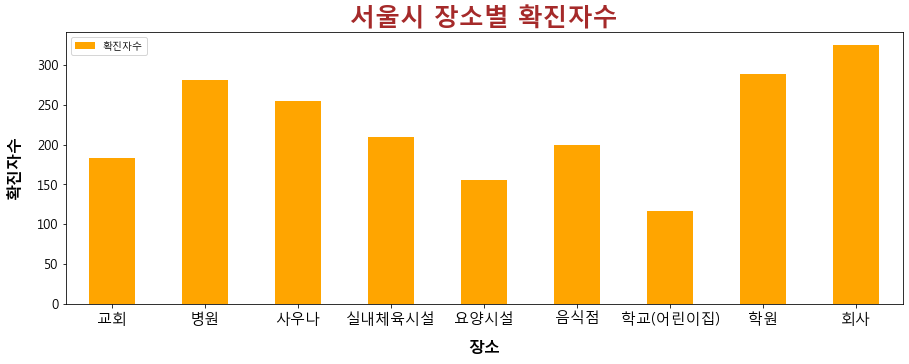

In [35]:
sum.plot(kind='bar', figsize=(15,5), color='orange')
plt.title('서울시 장소별 확진자수', size=25, color='brown', fontweight='bold')
plt.xticks(size=15, rotation='horizontal')
plt.yticks(size=13) 
plt.xlabel('장소', size=16, fontweight='bold', labelpad=13)
plt.ylabel('확진자수', size=16, fontweight='bold', labelpad=13)

plt.show()